In [12]:
#Name: Neeraja Prabhudesai
#Enrollment no: 0006

In [13]:
import matplotlib.pyplot as  plt

In [14]:
img = plt.imread('Flag_of_India.svg.png')

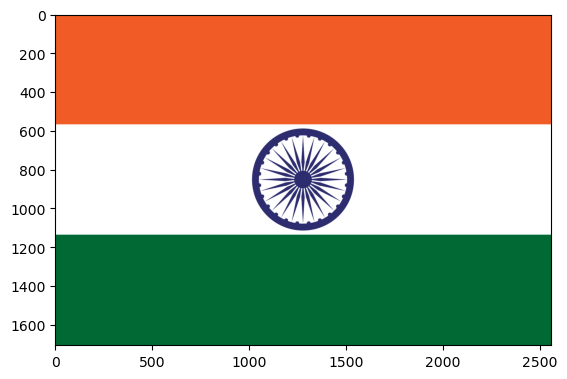

In [15]:
plt.imshow(img)

In [16]:
img

array([[[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       [[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       [[0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        ...,
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805],
        [0.94509804, 0.35686275, 0.14509805]],

       ...,

       [[0.        , 0.4117647 , 0.20392157],
        [0.        , 0.4117647 , 0.20392157],
        [0.        , 0

In [17]:
img.shape

(1707, 2560, 3)

In [18]:
## import the libraries

In [42]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import numpy as np

In [20]:
#Load the dataset

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
#60k images of size 28x28 pixels
x_train.shape

(60000, 28, 28)

In [23]:
x_test.shape

(10000, 28, 28)

In [24]:
y_test.shape

(10000,)

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

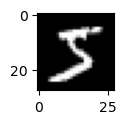

In [26]:
#input image
plt.figure(figsize=(1,1))
plt.imshow(x_train[0], cmap='gray')

In [27]:
#output label
y_train[0]

5

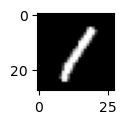

In [28]:
plt.figure(figsize=(1,1))
plt.imshow(x_train[23], cmap='gray')

In [29]:
y_train[23]

1

In [30]:
#Explore the images

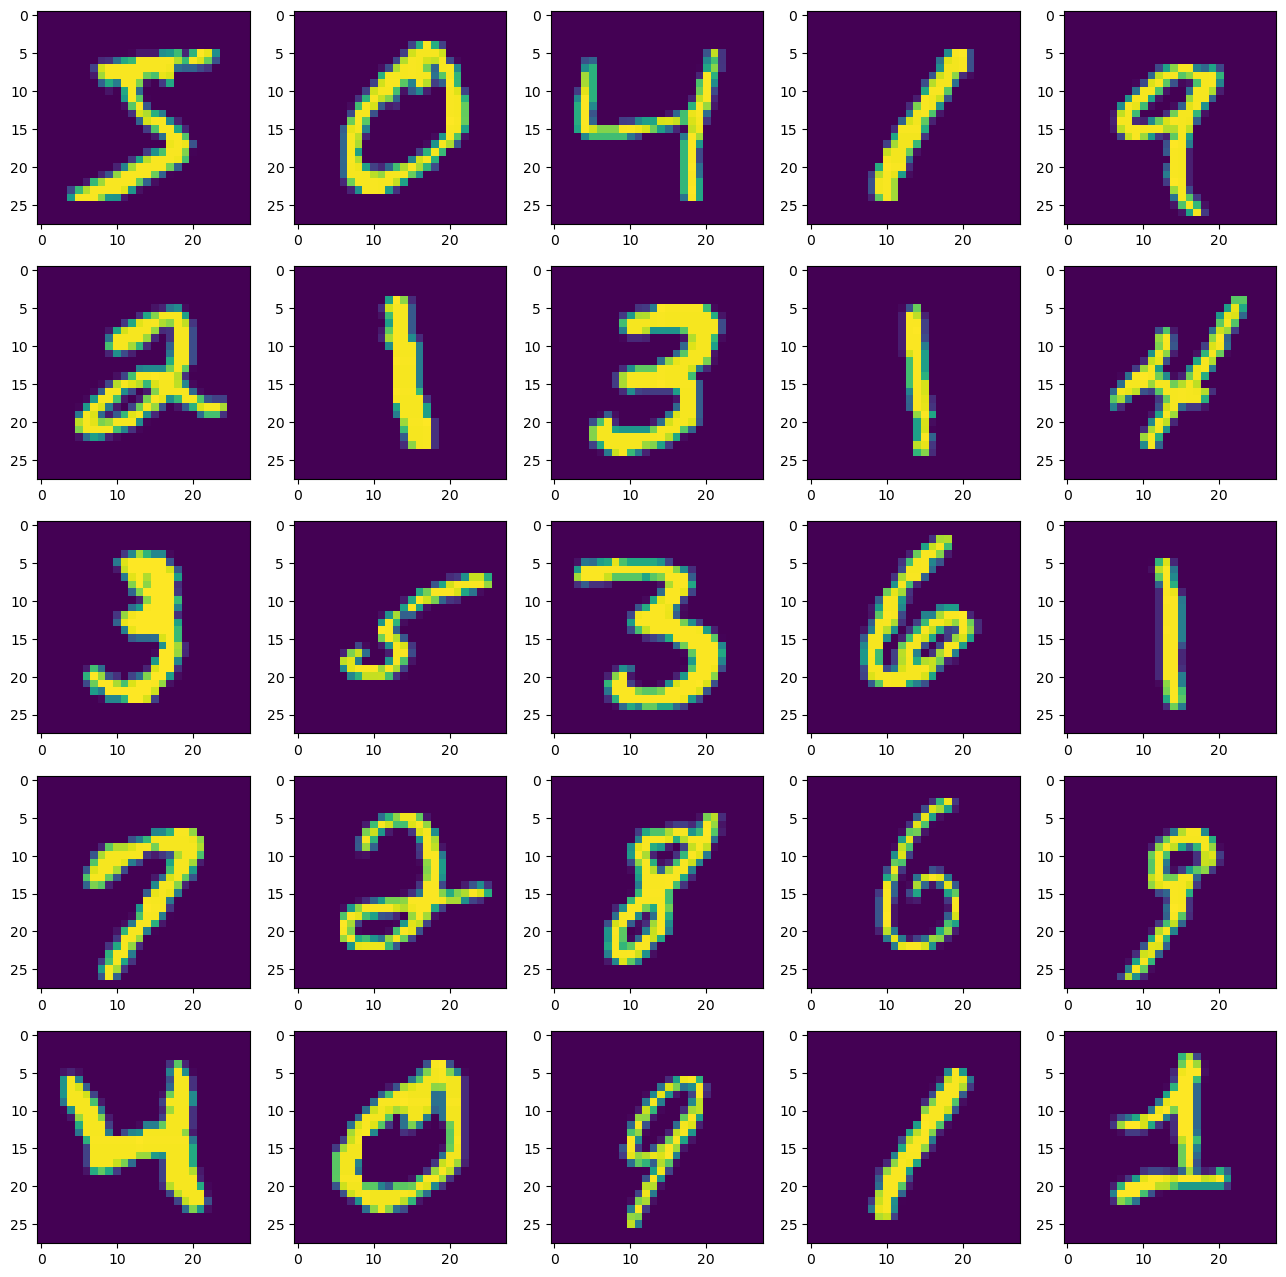

In [31]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.imshow(x_train[i])

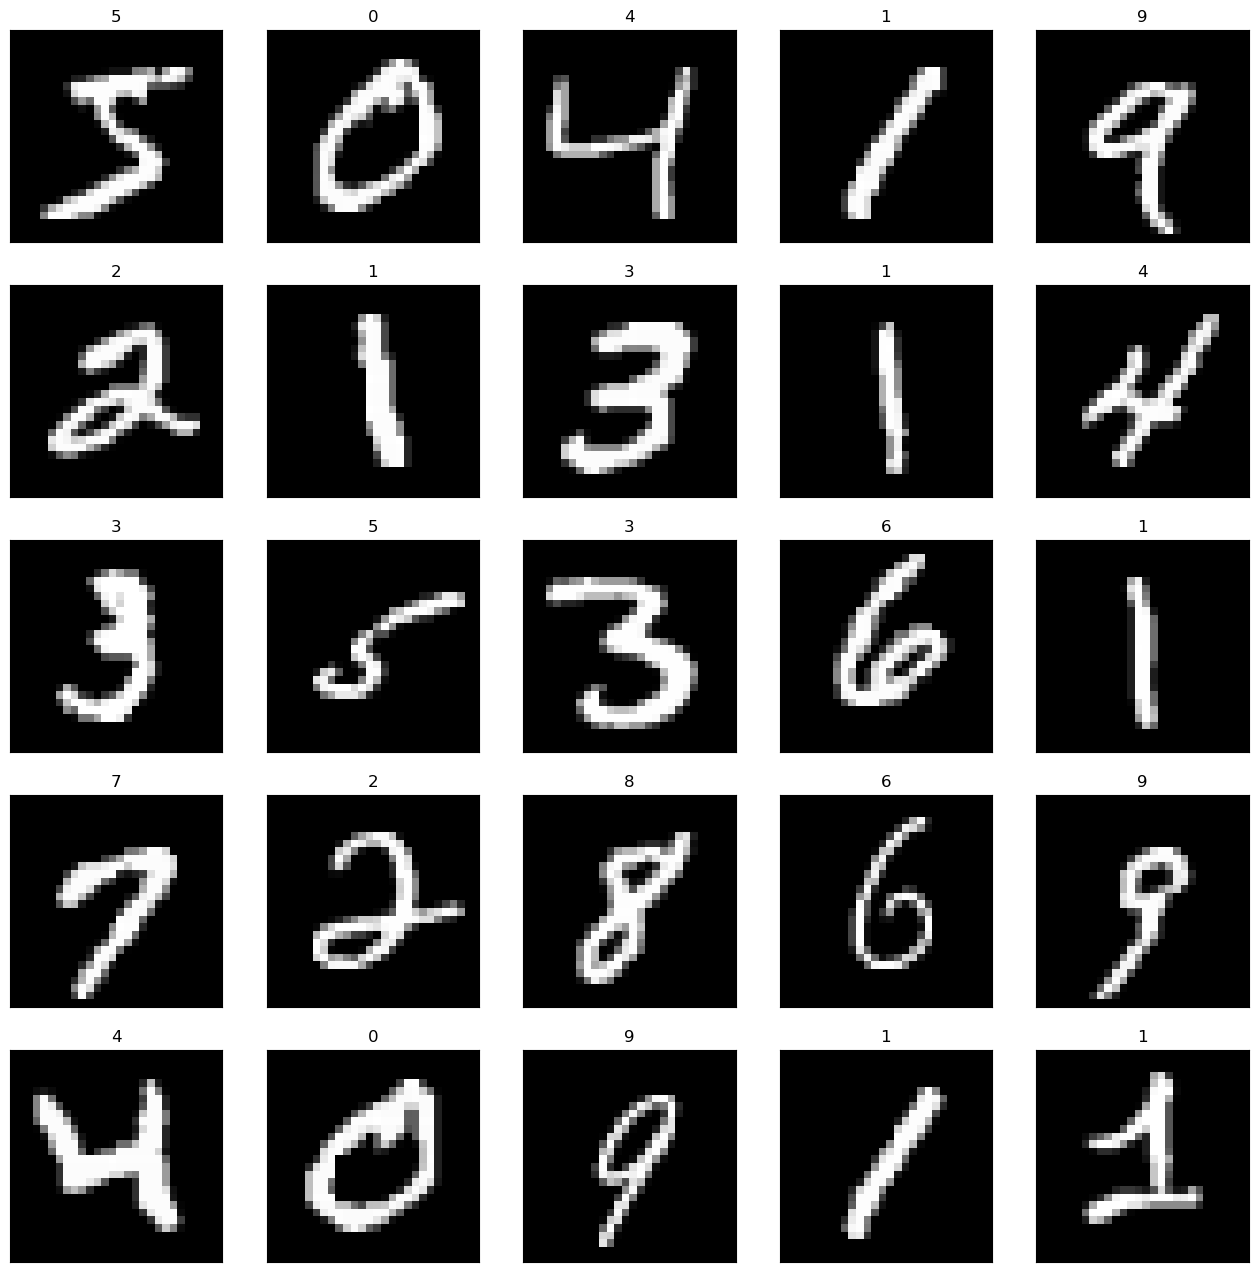

In [32]:
plt.figure(figsize=(16,16)) # 16x16 - aspect ration: width and height ratio
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([]) # removing coordinates
    plt.yticks([]) # removing coordinates
    plt.title(y_train[i]) # giving titlr for each image
    plt.imshow(x_train[i], cmap='gray') # changing color 

In [33]:
#Data Preperation

In [34]:
#normalize
x_train = x_train / 255
x_test = x_test / 255

In [35]:
x_train[0].shape

(28, 28)

In [37]:
#reshape the data to 3 dimensions
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [38]:
x_train.shape

(60000, 28, 28, 1)

In [39]:
x_test.shape

(10000, 28, 28, 1)

In [40]:
#build the CNN model

In [44]:
#create the object
model = Sequential()

#first convolutional layer
conv1 = Conv2D(filters=32, input_shape = (28,28,1), kernel_size=(3,3), activation='relu')
model.add(conv1)

#first pooling layer
pool1 = MaxPool2D(pool_size=(2,2))
model.add(pool1)

#second convolutional layer
conv2= Conv2D(filters=64, kernel_size=(3,3), activation='relu')
model.add(conv2)

#second pooling layer
pool2 = MaxPool2D(pool_size=(2,2))
model.add(pool2)

#Flatten the layer
model.add(Flatten())

#Build the ANN
model.add(Dense(64, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
#Compile the model

In [47]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [48]:
#train the model

In [49]:
model.fit(x_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.9199 - loss: 0.2453
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.9872 - loss: 0.0411
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9923 - loss: 0.0262
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9938 - loss: 0.0190
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9954 - loss: 0.0139
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9963 - loss: 0.0126
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9972 - loss: 0.0089
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.9975 - loss: 0.0080
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9978 - loss: 0.0068
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.9980 - loss: 0.0060


In [50]:
# Evaluate the model

In [51]:
model.evaluate(x_test, y_test, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.9888 - loss: 0.0562


[0.039703208953142166, 0.9911999702453613]

In [52]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [53]:
new = x_train[4567]

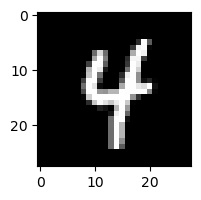

In [54]:
plt.figure(figsize=(2,2))
plt.imshow(new, cmap='gray')

In [56]:
new = x_train[4567]
new = new / 255
new = new.reshape(1, 28, 28, 1)
result = model.predict(new, verbose=False)
np.argmax(result)

4